# Weather Prediction using Machine Learning Algorithms

# Importing all necessary Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 1 : Load dataset 

In [7]:
df = pd.read_csv('weather.csv')

# Step 2 : Exploring the dataset

In [9]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


# Step 3 Data preprocessing

# Checking for null values

In [17]:
print(df.isnull().sum())

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


# Handle missing values (fill missing values with the column's mean )

In [20]:
# Fill missing values in 'Precip Type' column with the mode (most frequent value)
df['Precip Type'] = df['Precip Type'].fillna(df['Precip Type'].mode()[0])

# Check if missing values are filled
print(df['Precip Type'].isnull().sum())

0


# Convert Date column to datetime and extract relevant features

In [23]:
import pandas as pd


# Step 1: Convert 'Date' column to datetime (with timezone-aware datetime) using utc=True
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

# Step 2: Check the DataFrame
print(df)

# Step 3: Extract Year, Month, Day, and DayOfWeek using .dt
df['Year'] = df['Formatted Date'].dt.year
df['Month'] = df['Formatted Date'].dt.month
df['Day'] = df['Formatted Date'].dt.day
df['DayOfWeek'] = df['Formatted Date'].dt.dayofweek

# Step 4: Display the DataFrame
print(df)


                 Formatted Date        Summary Precip Type  Temperature (C)  \
0     2006-03-31 22:00:00+00:00  Partly Cloudy        rain         9.472222   
1     2006-03-31 23:00:00+00:00  Partly Cloudy        rain         9.355556   
2     2006-04-01 00:00:00+00:00  Mostly Cloudy        rain         9.377778   
3     2006-04-01 01:00:00+00:00  Partly Cloudy        rain         8.288889   
4     2006-04-01 02:00:00+00:00  Mostly Cloudy        rain         8.755556   
...                         ...            ...         ...              ...   
96448 2016-09-09 17:00:00+00:00  Partly Cloudy        rain        26.016667   
96449 2016-09-09 18:00:00+00:00  Partly Cloudy        rain        24.583333   
96450 2016-09-09 19:00:00+00:00  Partly Cloudy        rain        22.038889   
96451 2016-09-09 20:00:00+00:00  Partly Cloudy        rain        21.522222   
96452 2016-09-09 21:00:00+00:00  Partly Cloudy        rain        20.438889   

       Apparent Temperature (C)  Humidity  Wind Spe

# Encoding the Precip Type column

In [26]:
df['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

# One hot encoding

In [29]:
df = pd.get_dummies(df, columns=['Precip Type'])
df

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,DayOfWeek,Precip Type_rain,Precip Type_snow
0,2006-03-31 22:00:00+00:00,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,31,4,True,False
1,2006-03-31 23:00:00+00:00,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,31,4,True,False
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,5,True,False
3,2006-04-01 01:00:00+00:00,Partly Cloudy,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1,5,True,False
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1,5,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016,9,9,4,True,False
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016,9,9,4,True,False
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016,9,9,4,True,False
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016,9,9,4,True,False


# Mapping categoric to numeric

In [32]:
df['Precip Type_rain'] = df['Precip Type_rain'].map({True: 1, False: 0})
df['Precip Type_snow'] = df['Precip Type_snow'].map({True: 1, False: 0})

In [34]:
df

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,DayOfWeek,Precip Type_rain,Precip Type_snow
0,2006-03-31 22:00:00+00:00,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,31,4,1,0
1,2006-03-31 23:00:00+00:00,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,31,4,1,0
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,5,1,0
3,2006-04-01 01:00:00+00:00,Partly Cloudy,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1,5,1,0
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016,9,9,4,1,0
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016,9,9,4,1,0
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016,9,9,4,1,0
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016,9,9,4,1,0


# Handling Outliers

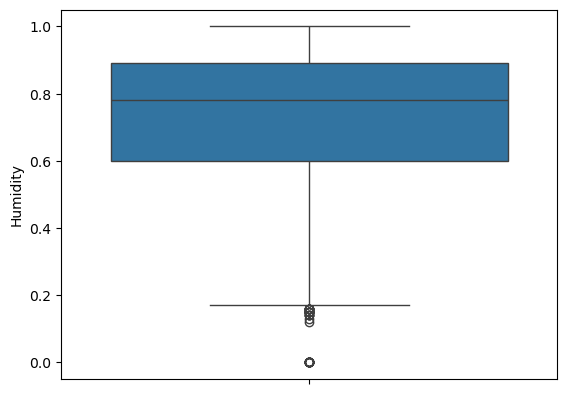

In [37]:
sns.boxplot(df["Humidity"])
plt.show()

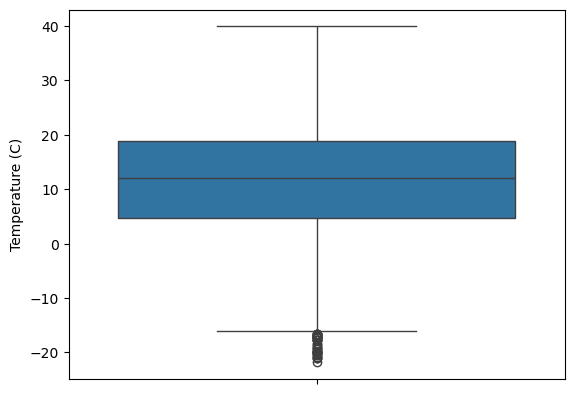

In [40]:
sns.boxplot(df["Temperature (C)"])
plt.show()

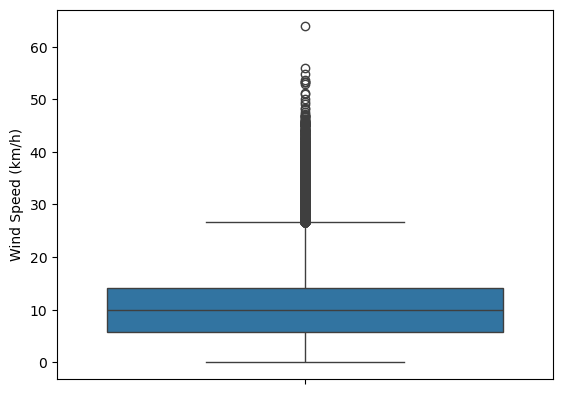

In [42]:
sns.boxplot(df["Wind Speed (km/h)"])
plt.show()

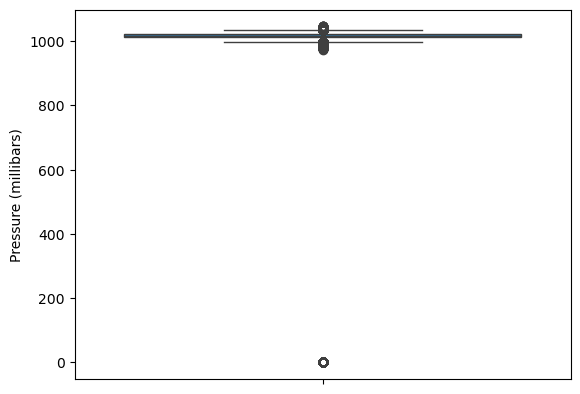

In [44]:
sns.boxplot(df["Pressure (millibars)"])
plt.show()

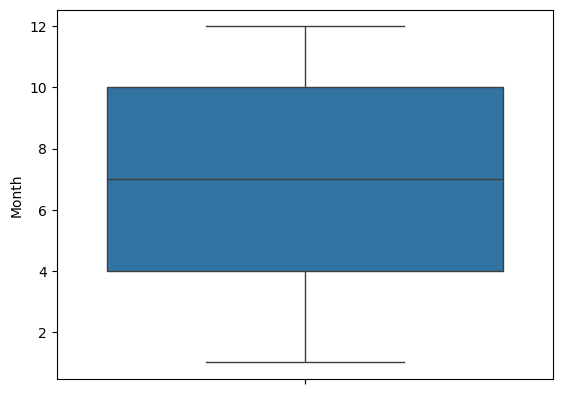

In [48]:
sns.boxplot(df["Month"])
plt.show()

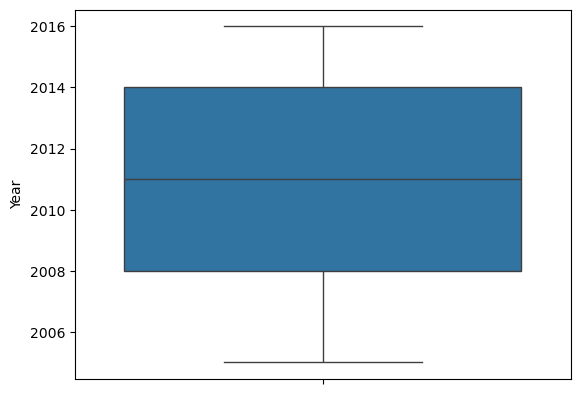

In [52]:
sns.boxplot(df["Year"])
plt.show()

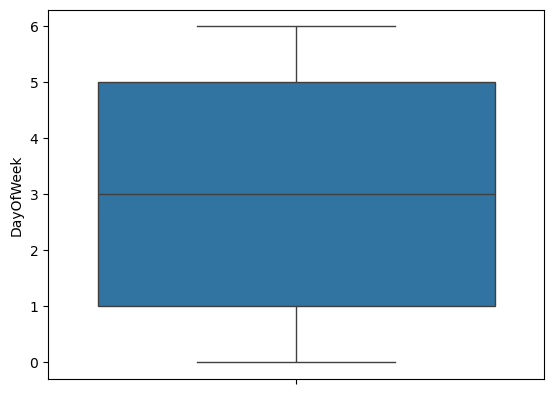

In [54]:
sns.boxplot(df["DayOfWeek"])
plt.show()

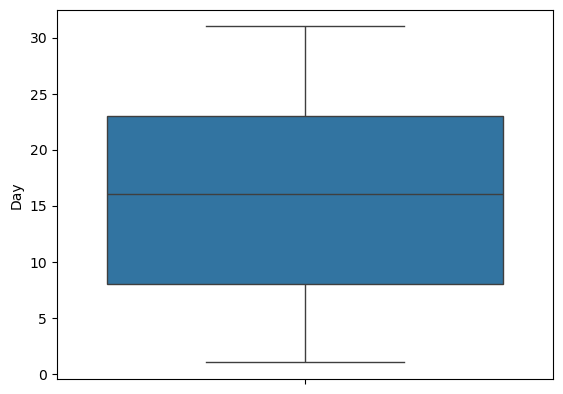

In [56]:
sns.boxplot(df["Day"])
plt.show()

In [60]:
Q1 = df['Humidity'].quantile(0.25)
Q3 = df['Humidity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Humidity'] = np.where(df['Humidity'] < lower_bound, lower_bound, df['Humidity'])
df['Humidity'] = np.where(df['Humidity'] > upper_bound, upper_bound, df['Humidity'])

In [62]:
Q1 = df['Temperature (C)'].quantile(0.25)
Q3 = df['Temperature (C)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Temperature (C)'] = np.where(df['Temperature (C)'] < lower_bound, lower_bound, df['Temperature (C)'])
df['Temperature (C)'] = np.where(df['Temperature (C)'] > upper_bound, upper_bound, df['Temperature (C)'])

In [64]:
Q1 = df['Wind Speed (km/h)'].quantile(0.25)
Q3 = df['Wind Speed (km/h)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Wind Speed (km/h)'] = np.where(df['Wind Speed (km/h)'] < lower_bound, lower_bound, df['Wind Speed (km/h)'])
df['Wind Speed (km/h)'] = np.where(df['Wind Speed (km/h)'] > upper_bound, upper_bound, df['Wind Speed (km/h)'])

In [66]:
Q1 = df['Pressure (millibars)'].quantile(0.25)
Q3 = df['Pressure (millibars)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Pressure (millibars)'] = np.where(df['Pressure (millibars)'] < lower_bound, lower_bound, df['Pressure (millibars)'])
df['Pressure (millibars)'] = np.where(df['Pressure (millibars)'] > upper_bound, upper_bound, df['Pressure (millibars)'])

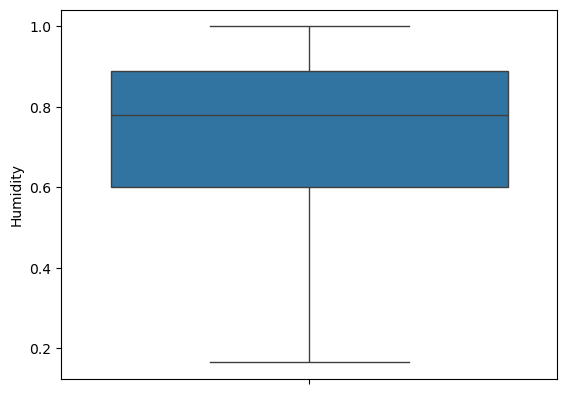

In [68]:
sns.boxplot(df["Humidity"])
plt.show()

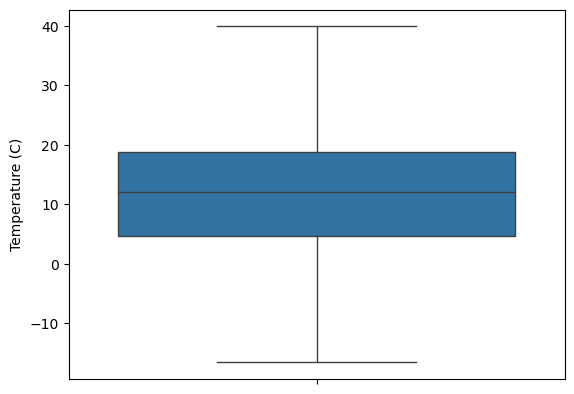

In [70]:
sns.boxplot(df["Temperature (C)"])
plt.show()

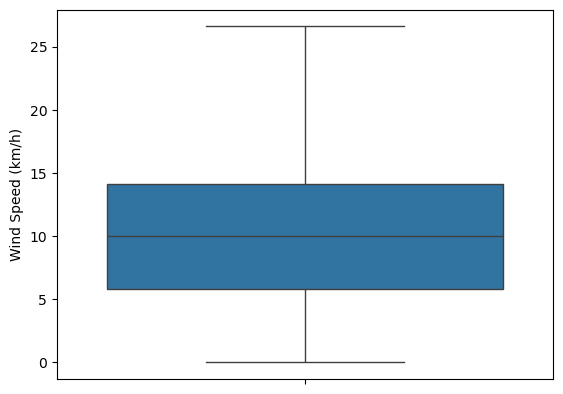

In [72]:
sns.boxplot(df["Wind Speed (km/h)"])
plt.show()

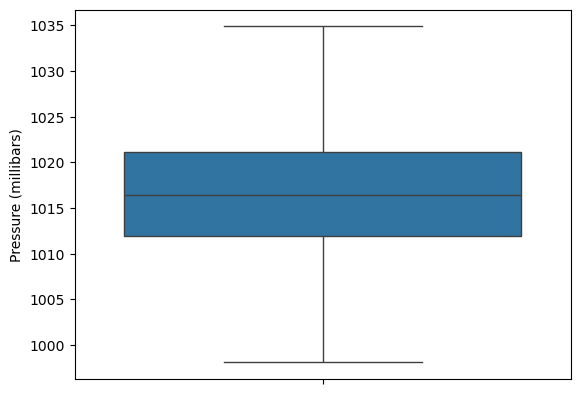

In [74]:
sns.boxplot(df["Pressure (millibars)"])
plt.show()

# Calculating Mean Temperature of each year

In [77]:
avg_temp = df.groupby('Year')['Temperature (C)'].mean()
avg_temp

Year
2005     0.577778
2006    11.215225
2007    12.134677
2008    12.161819
2009    12.269712
2010    11.200176
2011    11.524934
2012    11.997396
2013    11.941017
2014    12.528228
2015    12.312088
2016    11.987381
Name: Temperature (C), dtype: float64

# Plot for Average Temperature vs Year

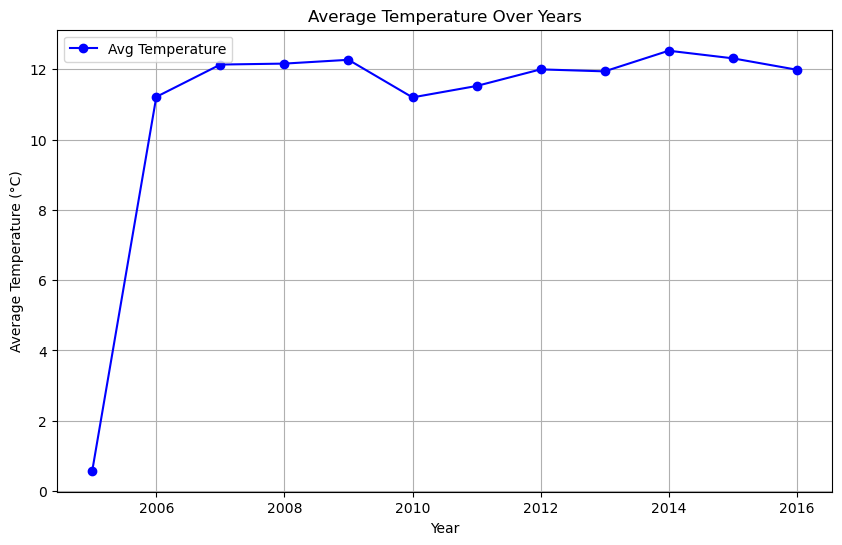

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(avg_temp, marker='o', linestyle='-', color='b', label='Avg Temperature')
plt.title('Average Temperature Over Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()

# Step 4 : Feature Selection

In [83]:
# Selecting the features and target variable
X = df[['Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)', 'Month', 'Day', 'DayOfWeek', 'Year', 'Precip Type_rain', 'Precip Type_snow']]  # Features
y = df['Temperature (C)']

# Step 5: Split Data into Training and Test Sets

In [86]:
# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Scale the Data (Optional)

In [89]:
scaler = StandardScaler()

# Fit on training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 7: Model Selection and Training

# Linear Regression

In [93]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Random Forest Regressor

In [96]:
# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Step 8: Evaluate the Model

In [98]:
# Linear Regression Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [99]:
print("Linear Regression - MAE:", mae_lr)
print("Linear Regression - RMSE:", rmse_lr)
print("Linear Regression - R²:", r2_lr)

print("\nRandom Forest - MAE:", mae_rf)
print("Random Forest - RMSE:", rmse_rf)
print("Random Forest - R²:", r2_rf)

Linear Regression - MAE: 4.541174191687934
Linear Regression - RMSE: 5.593762545454751
Linear Regression - R²: 0.6604096443972614

Random Forest - MAE: 1.1506676752012024
Random Forest - RMSE: 1.6052647279507593
Random Forest - R²: 0.9720333388324416


# Step 9: Visualize Predictions vs. Actual Values

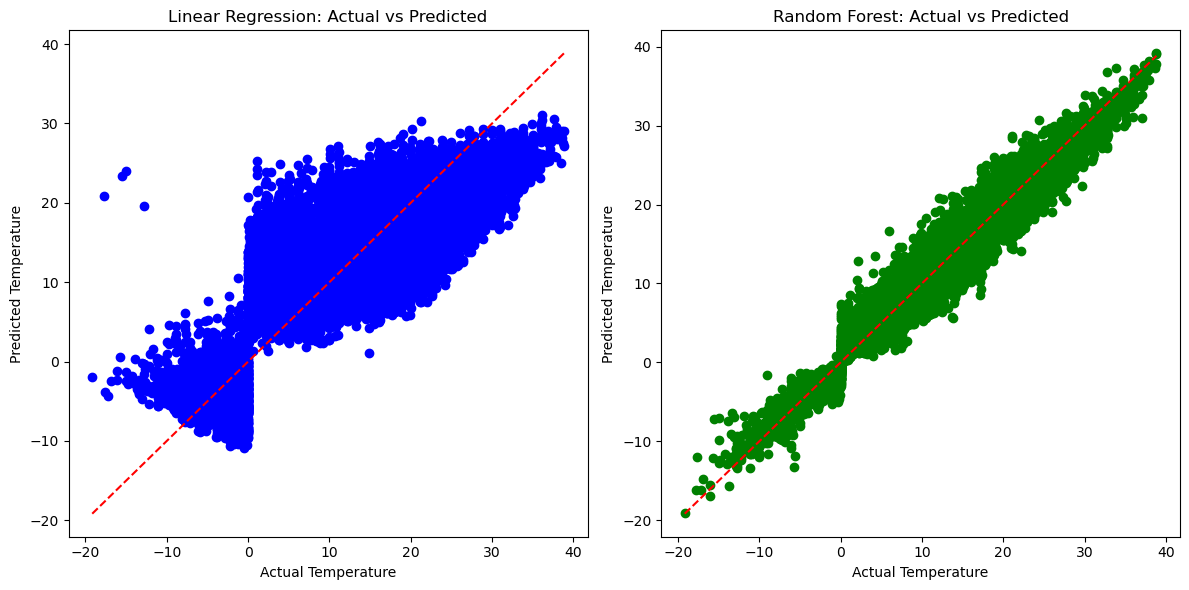

In [254]:
# Plot predictions vs actual values
plt.figure(figsize=(12, 6))

# Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')

# Plot for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')

plt.tight_layout()
plt.show()
